In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Books_Data_Clean.csv')

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
df = df[df["Publishing Year"] > 1900]

In [6]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [7]:
df.duplicated().sum()

0

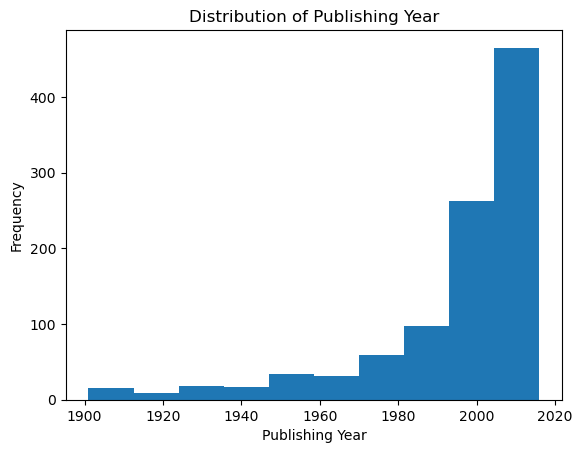

In [9]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

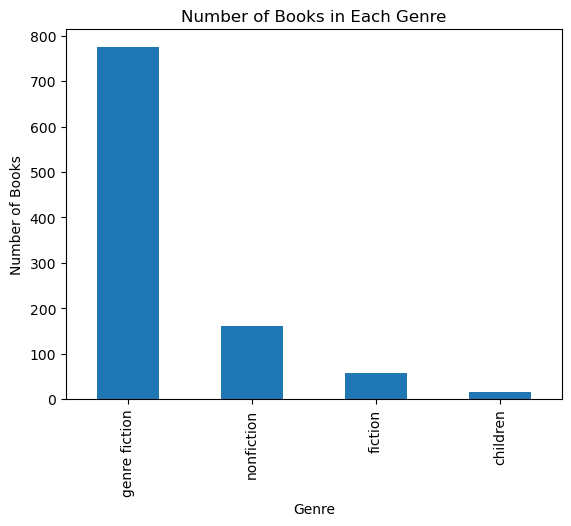

In [11]:
df["genre"].value_counts().plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.show()

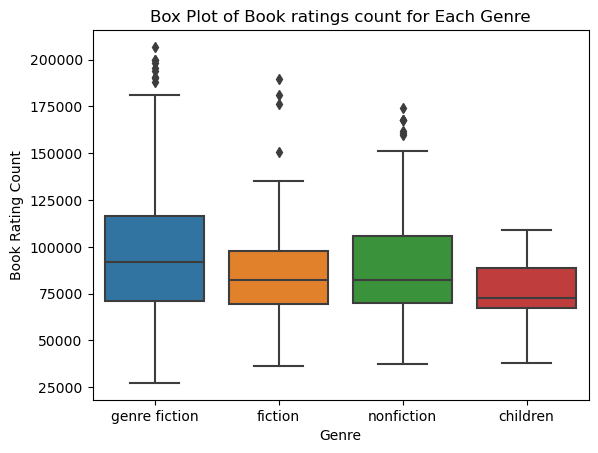

In [12]:
sns.boxplot(x = "genre", y = "Book_ratings_count", data = df)
plt.xlabel("Genre")
plt.ylabel("Book Rating Count")
plt.title("Box Plot of Book ratings count for Each Genre")
plt.show()

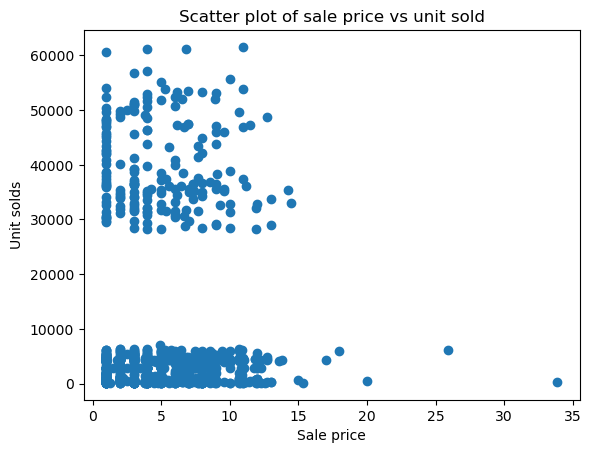

In [14]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale price")
plt.ylabel("Unit solds")
plt.title("Scatter plot of sale price vs unit sold")
plt.show()

In [17]:
language_counts = df["language_code"].value_counts()

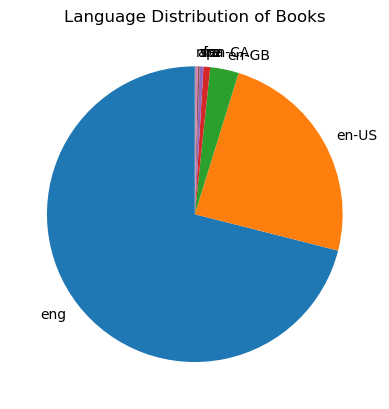

In [18]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90)
plt.title("Language Distribution of Books")
plt.show()

In [20]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending = False)

Publisher 
Penguin Group (USA) LLC                 202987.308
Random House LLC                        185744.244
Amazon Digital Services,  Inc.          144415.350
HarperCollins Publishers                124264.770
Hachette Book Group                     108446.700
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [21]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False)

Author_Rating
Intermediate    101710.152921
Famous           97306.470588
Novice           87318.464286
Excellent        83529.591954
Name: Book_ratings_count, dtype: float64

In [22]:
df.groupby("language_code").size().sort_values(ascending = False)

language_code
eng      682
en-US    232
en-GB     30
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

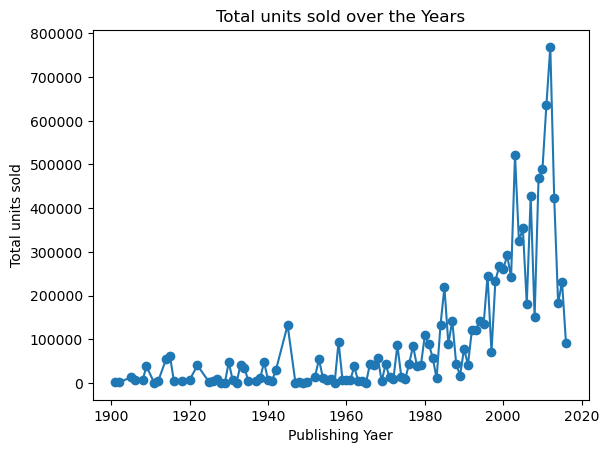

In [24]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = "line", marker = "o")
plt.xlabel("Publishing Yaer")
plt.ylabel("Total units sold")
plt.title("Total units sold over the Years")
plt.show()